# Flights Data Exploration
## by Thays Martinez

## Preliminary Wrangling

This document explores approximately 3 million cancelled and delayed flights within United States and Canada which were registered between 1st of January 2018 and 31st of December 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# Load dataset into a pandas DataFrame
df_flights = pd.read_csv('flights.csv', low_memory=False)

In [3]:
# High-level overview of data shape and composition
pd.set_option('display.max_columns', 35)
print(df_flights.shape)
print(df_flights.info(null_counts=True))

(2993472, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993472 entries, 0 to 2993471
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   year              2993472 non-null  int64  
 1   month             2993472 non-null  object 
 2   weekday           2993472 non-null  object 
 3   dep_airport       2993472 non-null  object 
 4   dep_state         2993472 non-null  object 
 5   dest_airport      2993472 non-null  object 
 6   dest_state        2993472 non-null  object 
 7   crs_dep_time      2993472 non-null  object 
 8   dep_delay         2741963 non-null  float64
 9   taxi_out          2741963 non-null  float64
 10  taxi_in           2741963 non-null  float64
 11  crs_arr_time      2993472 non-null  object 
 12  arr_delay         2741963 non-null  float64
 13  fl_type           2993472 non-null  object 
 14  canc_desc         251509 non-null   object 
 15  diverted          2993472 non-null 

In [4]:
# Convert to category
columns = ['year', 'month', 'weekday', 'canc_desc', 'diverted']
convert_cat = lambda x: x.astype('category') if x.name in columns else x

df_flights = df_flights.apply(convert_cat)

In [5]:
df_flights.head()

,year,month,weekday,dep_airport,dep_state,dest_airport,dest_state,crs_dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_delay,fl_type,canc_desc,diverted,crs_elapsed_time,air_time,Carrier,Weather,NAS,Security,Late Aircraft
0,2019,Mar,Fri,CVG,OH,MSP,MN,15:34:00,43.0,28.0,18.0,16:48:00,59.0,Delayed,NaN,No,134,104.0,0.0,0.0,59.0,0.0,0.0
1,2019,Mar,Fri,JFK,NY,BUF,NY,09:40:00,55.0,56.0,8.0,11:14:00,82.0,Delayed,NaN,No,94,57.0,0.0,55.0,27.0,0.0,0.0
2,2019,Mar,Fri,MSN,WI,LGA,NY,18:45:00,69.0,14.0,13.0,21:58:00,74.0,Delayed,NaN,No,133,111.0,0.0,0.0,6.0,0.0,68.0
3,2019,Mar,Fri,JFK,NY,BUF,NY,13:36:00,114.0,30.0,6.0,15:13:00,105.0,Delayed,NaN,No,97,52.0,35.0,0.0,0.0,0.0,70.0
4,2019,Mar,Fri,ATL,GA,TYS,TN,13:40:00,45.0,18.0,3.0,14:38:00,42.0,Delayed,NaN,No,58,34.0,42.0,0.0,0.0,0.0,0.0


In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993472 entries, 0 to 2993471
Data columns (total 23 columns):
 #   Column            Dtype   
---  ------            -----   
 0   year              category
 1   month             category
 2   weekday           category
 3   dep_airport       object  
 4   dep_state         object  
 5   dest_airport      object  
 6   dest_state        object  
 7   crs_dep_time      object  
 8   dep_delay         float64 
 9   taxi_out          float64 
 10  taxi_in           float64 
 11  crs_arr_time      object  
 12  arr_delay         float64 
 13  fl_type           object  
 14  canc_desc         category
 15  diverted          category
 16  crs_elapsed_time  int64   
 17  air_time          float64 
 18  Carrier           float64 
 19  Weather           float64 
 20  NAS               float64 
 21  Security          float64 
 22  Late Aircraft     float64 
dtypes: category(5), float64(10), int64(1), object(7)
memory usage: 425.4+ MB


### What is the structure of your dataset?

This dataset contains 2,993,472 flights which were cancelled or delayed. It is comprised of 23 features: year, month, weekday, dep_airport, dep_state, dest_airport, dest_state, crs_dep_time, dep_delay, taxi_out, taxi_in, crs_arr_time, arr_delay, fl_type, canc_desc, diverted, crs_elapsed_time, air_time, Carrier, Weather, NAS, Security, Late Aircraft.


The columns Carrier, Weather, NAS, Security and Late Aircraft record delay duration in minutes for flights which have been finalized, and have the following definitions:

- **Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **NAS:** Stands for National Aviation System. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- **Late Aircraft:** a previous flight with same aircraft arrived late, causing the present flight to depart late.

Most variables are either numeric or object types. The variable **cancellation_desc** is categorical and, except for Late Aircraft (which occurs only if a flight has been finalized), its values have the same classification as above.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what factors have the most influence in flight cancellation and severe delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although delay cause will give us a good indication of the reason a flight is delayed, I am also expecting that features such as flight date, origin state, CRS departure time and arrival delay will have effects on flight's cancellation and delay duration. I also think that other features will have effects on the cancellation and delay's duration, though to a much smaller degree.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [7]:
def chart_props(df, col_name):
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col_name].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        
        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)
        
        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', verticalalignment='bottom', color = 'black')
        
# create the plot
sb.set_style('darkgrid')
base_color = sb.color_palette()[0]

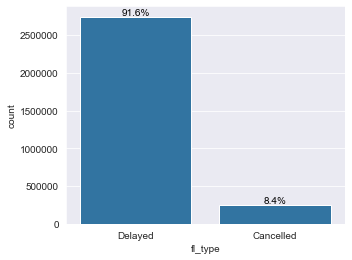

In [8]:
plt.figure(figsize=[5, 4])
col_order = df_flights.fl_type.value_counts().index

sb.countplot(data=df_flights, x='fl_type', color=base_color, order=col_order)
chart_props(df_flights, 'fl_type')

In this dataset of cancelled and delayed flights, cancelled flights accounts for approximately 8% of the dataset. 

I'll look into the features in common to both types of flights to find out if there's any similarity between cancelled and delayed flights.

In [9]:
# Load flight types into separate DataFrames
df_cancel = df_flights.query('fl_type == "Cancelled"').reset_index(drop=True)
df_delay = df_flights.query('fl_type == "Delayed"').reset_index(drop=True)

In [10]:
# Breakdown datetime objects
variables = ['crs_dep_time', 'crs_arr_time']

canc_hour = lambda x: x.astype(str).str[:2] if x.name in variables else x
delay_hour = lambda x: x.astype(str).str[:2] if x.name in variables else x

df_cancel = df_cancel.apply(canc_hour)
df_delay = df_delay.apply(delay_hour)

In [11]:
print(df_cancel[['crs_dep_time', 'crs_arr_time']].head())
print('\n')
print(df_delay[['crs_dep_time', 'crs_arr_time']].head())

  crs_dep_time crs_arr_time
0           18           20
1           19           21
2           17           19
3           10           11
4           20           22


  crs_dep_time crs_arr_time
0           15           16
1           09           11
2           18           21
3           13           15
4           13           14


In [12]:
id_vars = ['year', 'month', 'weekday', 'dep_airport', 'dep_state',
            'dest_airport', 'dest_state', 'crs_dep_time', 'dep_delay',
           'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_delay', 'fl_type',
           'canc_desc', 'diverted', 'crs_elapsed_time', 'air_time']

value_vars = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

melt_delay = pd.melt(df_delay, id_vars=id_vars, value_vars=value_vars, 
                     var_name='delay_desc', value_name='delay_dur')

index_names = melt_delay[melt_delay['delay_dur'] == 0].index
melt_delay.drop(index_names, inplace=True)

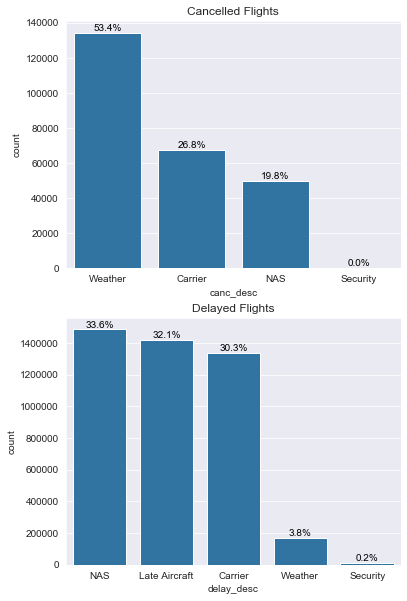

In [14]:
plt.figure(figsize=[6, 10])

plt.subplot(2, 1, 1)
col_order = df_cancel.canc_desc.value_counts().index
sb.countplot(data=df_cancel, x='canc_desc', color=base_color, order=col_order)
chart_props(df_cancel, 'canc_desc')
plt.title('Cancelled Flights')

plt.subplot(2, 1, 2)
col_order = melt_delay.delay_desc.value_counts().index
sb.countplot(data=melt_delay, x='delay_desc', color=base_color, order=col_order)
chart_props(melt_delay, 'delay_desc')
plt.title('Delayed Flights');

In [15]:
nb_security = df_cancel.query('canc_desc == "Security"').fl_type.count()

print('Flights cancelled for security reasons: {}'.format(nb_security))

Flights cancelled for security reasons: 63


- More than half of cancelled flights have severe weather condition as cause for cancellation
- Less than 0.03% of flights were cancelled for security reasons
- On the other hand, severe weather conditions is one of least occurring reasons for a delayed flight
- NAS, Late Aircraft and Carrier delay causes appears almost equally with approximately 23% of delayed flights
- As in Cancelled Flights, Security is the least reported delay cause
- <font color='blue'>Since a delayed flight may have more than one reason for delay, it is worth investigating if average delay duration per delay description holds the same trend</font>

Next up: Top origin and destination state by number of cancelled flights.

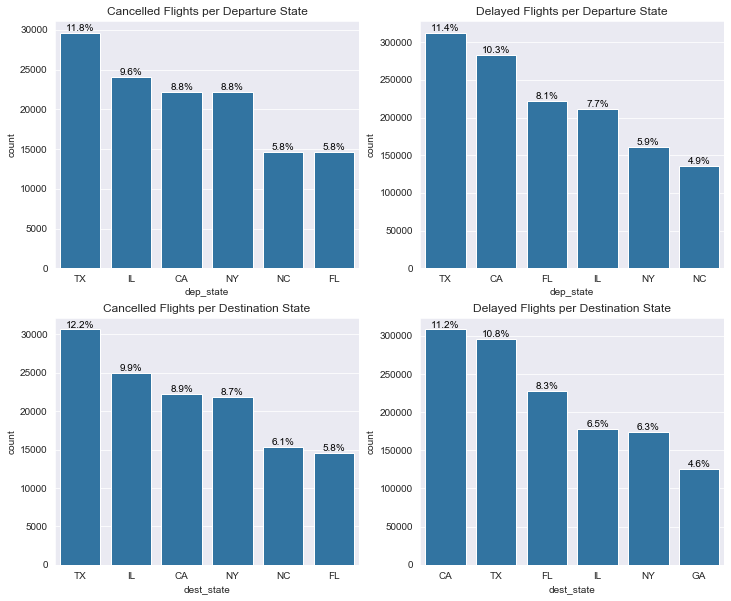

In [16]:
plt.figure(figsize = [12, 10]) # larger figure size for subplots
 
dep_canc = df_cancel.dep_state.value_counts().index[:6]
dest_canc = df_cancel.dest_state.value_counts().index[:6] 

dep_delay = df_delay.dep_state.value_counts().index[:6]
dest_delay = df_delay.dest_state.value_counts().index[:6] 

plt.subplot(2, 2, 1) # 2 rows, 1 col, subplot 1
sb.countplot(data = df_cancel, x = 'dep_state', color=base_color, order=dep_canc)
chart_props(df_cancel, 'dep_state')
plt.title('Cancelled Flights per Departure State')

plt.subplot(2, 2, 2) # 2 rows, 1 col, subplot 1
sb.countplot(data = df_delay, x = 'dep_state', color=base_color, order=dep_delay)
chart_props(df_delay, 'dep_state')
plt.title('Delayed Flights per Departure State')

plt.subplot(2, 2, 3) # 2 rows, 1 col, subplot 2
sb.countplot(data = df_cancel, x = 'dest_state', color=base_color, order=dest_canc)
chart_props(df_cancel, 'dest_state')
plt.title('Cancelled Flights per Destination State')

plt.subplot(2, 2, 4) # 2 rows, 1 col, subplot 1
sb.countplot(data = df_delay, x = 'dest_state', color=base_color, order=dest_delay)
chart_props(df_delay, 'dest_state')
plt.title('Delayed Flights per Destination State');

- Approximately 50% of flight cancellations and delays occur in 6 states
- Ranking of flights cancelled per origin matches the destination raking, <font color='blue'>suggesting that certain routes are more prone to cancellation therefore further investigation of Departure - Destination State pair is necessary</font>
- These states may be more susceptible to severe weather conditions, <font color='blue'>looking into which months most cancellations and delays occurred in these states may support this claim</font>
- Ranking of departure delayed flights per state almost match destination ranking, which supports the hypotesis that certain routes are more prone to delays (TX, CA, FL, IL, GA, NY)

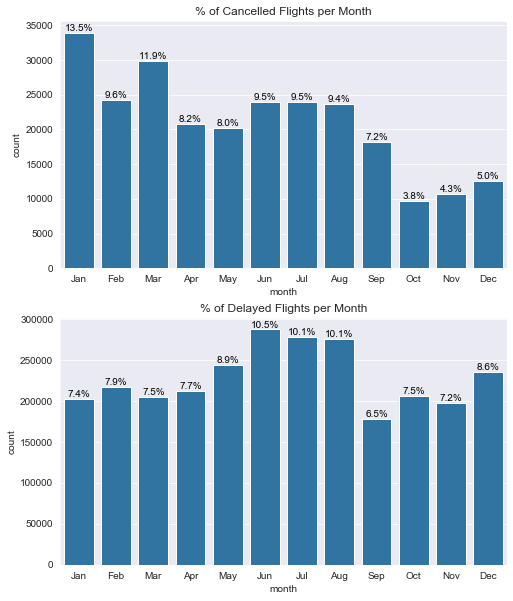

In [17]:
plt.figure(figsize=[8, 10])

order_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplot(2, 1, 1)
sb.countplot(data=df_cancel, x='month', color=base_color, order=order_month)
chart_props(df_cancel, 'month')
plt.title('% of Cancelled Flights per Month')

plt.subplot(2, 1, 2)
sb.countplot(data=df_delay, x='month', color=base_color, order=order_month)
chart_props(df_delay, 'month')
plt.title('% of Delayed Flights per Month');

- It looks like flights tend to be cancelled more in January and March, having another peak in June, July and August
- Last quarter of the year register the least cancellations, progressively ramping up in October, November and December
- On the delays side, there is a completely different picture: June, July and August register the most delays, suggesting that summer holidays may influence the behavior
- <font color='blue'>Is the trend also noticed when looking into 2018 and 2019 individually?</font>
- <font color='blue'>Does the average delay duration per month hold the same trend?</font>

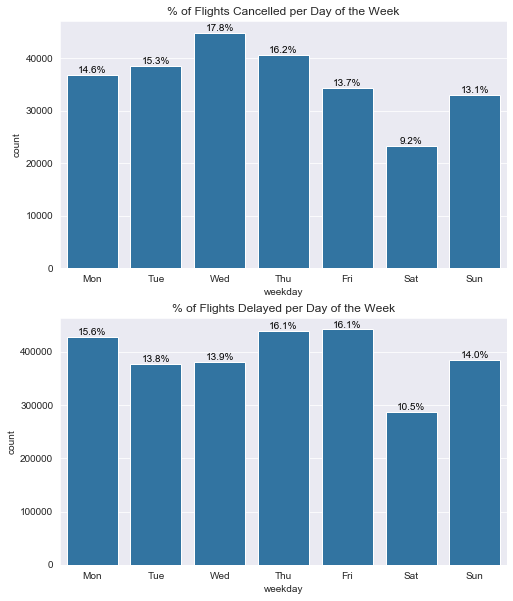

In [18]:
plt.figure(figsize=[8, 10])

order_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.subplot(2, 1, 1)
sb.countplot(data=df_cancel, x='weekday', color=base_color, order=order_week)
chart_props(df_cancel, 'weekday')
plt.title('% of Flights Cancelled per Day of the Week')

plt.subplot(2, 1, 2)
sb.countplot(data=df_delay, x='weekday', color=base_color, order=order_week)
chart_props(df_delay, 'weekday')
plt.title('% of Flights Delayed per Day of the Week');

- Most cancellations in 2018 and 2019 were registered on Wednesday, whereas most delays in the same period occurred on Thursday and Friday
- <font color='blue'>On the delayed flights it is interesting to investigate average delay duration per day of the week</font>
- Saturday is the day of the week which registers the least number of cancellations and delays

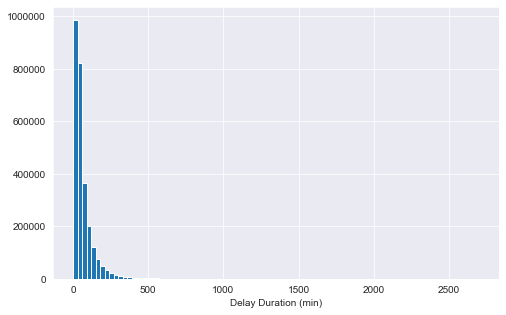

In [19]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 5])
bin_edges = np.arange(0, df_delay['arr_delay'].max()+30, 30)
plt.hist(data=df_delay, x='arr_delay', bins=bin_edges)
plt.xlabel('Delay Duration (min)');

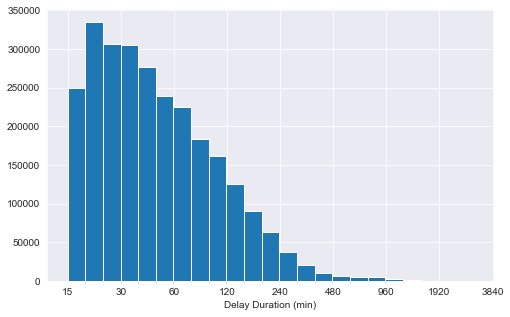

In [20]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bin_min = np.log10(df_delay.arr_delay.min())
bin_max = np.log10(df_delay.arr_delay.max())

bins = 10 ** np.arange(bin_min, bin_max+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_delay, x = 'arr_delay', bins = bins)
plt.xscale('log')
plt.xticks([15, 3e1, 6e1, 12e1, 24e1, 48e1, 96e1, 192e1, 384e1], 
           [15, '30', '60', '120', '240', '480', '960', '1920', '3840'])
plt.xlabel('Delay Duration (min)')
plt.show()

- The bulk of flight delays falls between 15 and 240 min.

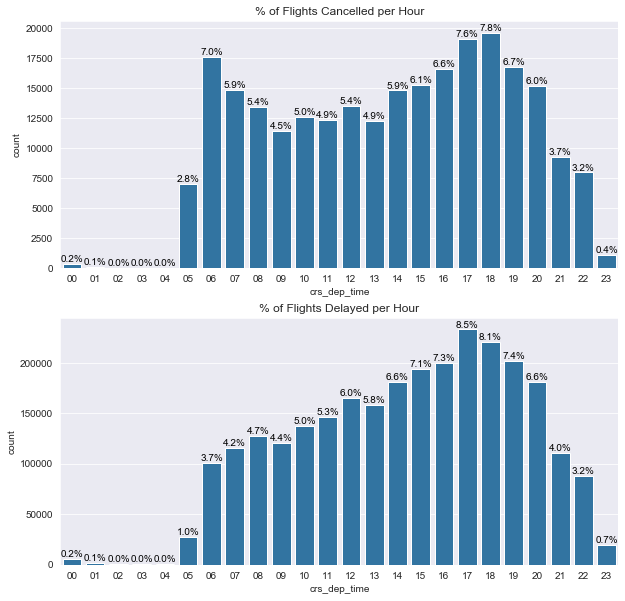

In [21]:
# During which times occur the most delays?
plt.figure(figsize=[10, 10])

plt.subplot(2, 1, 1)
sb.countplot(data=df_cancel, x='crs_dep_time', color=base_color)
chart_props(df_cancel, 'crs_dep_time')
plt.title('% of Flights Cancelled per Hour')

plt.subplot(2, 1, 2)
sb.countplot(data=df_delay, x='crs_dep_time', color=base_color)
chart_props(df_delay, 'crs_dep_time')
plt.title('% of Flights Delayed per Hour');

Is the trend similar in both years? 
- there is almost no cancellation or delays between 00h00 and 04h00 mainly because there is no flights operating (departing) during those times
- 17:00 and 18:00 are the period when most flights get cancelled or delayed. Number of Delays and cancellations starts to decrease progressively from then.
- <font color=blue>What is the major cause for cancellation at 6h, 17h and 18h?</font> 
- Delays start to build up as the hours passes by, reaching a peak at 5PM, and decreases hour by hour
- NAS and Aircraft delay being the main cause, the decrease may be due to end of aircraft operation for that day.

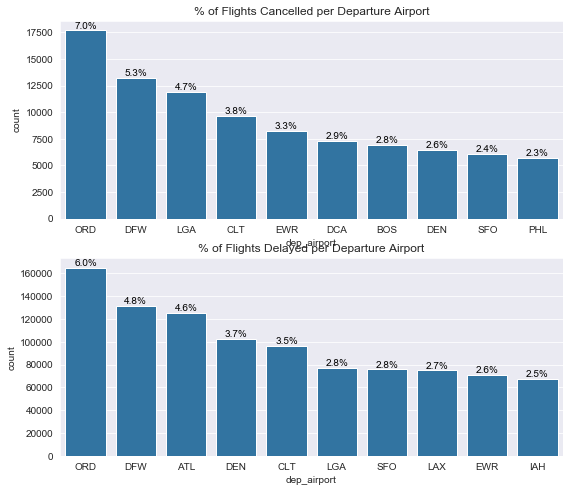

In [22]:
plt.figure(figsize=[9, 8])

airport_cancel = df_cancel.dep_airport.value_counts().index[:10]
airport_delay = df_delay.dep_airport.value_counts().index[:10] 

plt.subplot(2, 1, 1)
sb.countplot(data=df_cancel, x='dep_airport', color=base_color, order=airport_cancel)
chart_props(df_cancel, 'dep_airport')
plt.title('% of Flights Cancelled per Departure Airport')

plt.subplot(2, 1, 2)
sb.countplot(data=df_delay, x='dep_airport', color=base_color, order=airport_delay)
chart_props(df_delay, 'dep_airport')
plt.title('% of Flights Delayed per Departure Airport');

- O'Hare International Airport is home to most cancellation and delays 
- <font color=blue>The relationship between airport and average arrival delay may truly show which airport has the most disruptive delays</font>
- <font color=blue>Additionally, taxi out and taxi in times may also indicate which airports have challenges in operational procedures prior to departure (increase in fuel consumption and emissions) </font>

Better prediction of taxi-out time allows all stakeholders to arrange the future activities in airport operation. Efficient taxi-out prediction methods are effective approaches when the aim is to eliminate delays and improve the utilization of resources. Once taxi-out time is predicted in advance, operators gain a flexibility that allows them to adjust the schedule, gates assignment, and pushback plan. This achieves the smoother operation of an airport and reduces its surface congestion and fuel-burn costs.


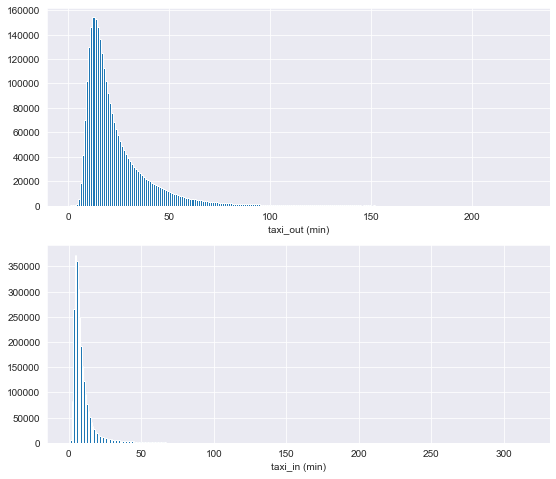

In [23]:
fig, ax = plt.subplots(nrows=2, figsize = [9, 8])

variables = ['taxi_out', 'taxi_in']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_delay[var]), max(df_delay[var])+1, 1)
    ax[i].hist(data = df_delay, x = var, bins = bins)
    ax[i].set_xlabel('{} (min)'.format(var))
    
plt.show()

In [24]:
print('Maximum:')
print('Taxi-out time (max): {}'.format(max(df_delay.taxi_out)))
print('Taxi-in time (max): {}'.format(max(df_delay.taxi_in)))

Maximum:
Taxi-out time (max): 227.0
Taxi-in time (max): 316.0


Both taxi-out and taxi-in distributions are highly skewed to the right, where the majority of aircraft taxi times within the range of 0 to 50 minutes.
Limiting the chart display range can indicate exactly what are the most common taxiing intervals:

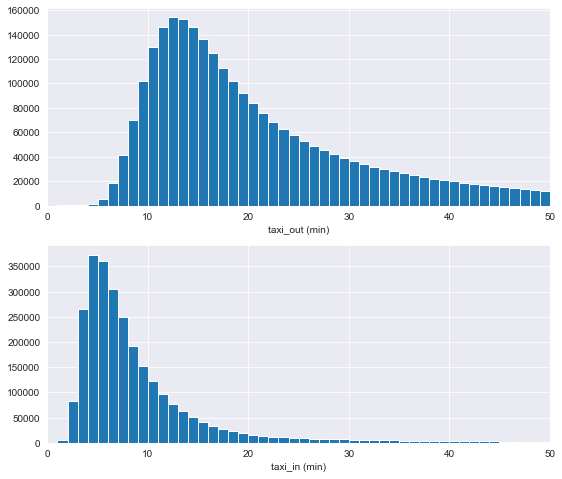

In [25]:
fig, ax = plt.subplots(nrows=2, figsize = [9, 8])

variables = ['taxi_out', 'taxi_in']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_delay[var]), max(df_delay[var])+1, 1)
    ax[i].hist(data = df_delay, x = var, bins = bins)
    ax[i].axis(xmin=0, xmax=50)
    ax[i].set_xlabel('{} (min)'.format(var))
    
plt.show()

- Taxiing takes longer for outbound flights, when the majority of delayed flights takes between 10 to 20 minutes to taxi the aircraft
- Most delayed inbound flights takes between 0 to 10 mintues to taxi the aircraft

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The arrival delay variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with a peak between 15 and 60 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the taxi-in and taxi-out size variables, a number of outlier points were identified. Tidying and adjustment of data were performed in a previous step, therefore the values observed are the actual values and were kept in the analysis. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

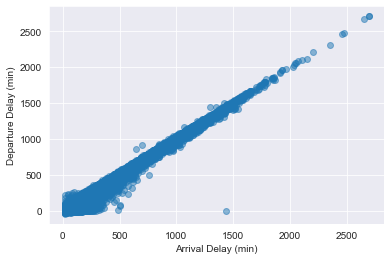

In [26]:
plt.scatter(data=df_delay, x='arr_delay', y='dep_delay', alpha=.5)
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Departure Delay (min)');

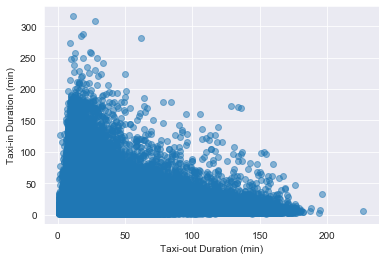

In [27]:
plt.scatter(data=df_delay, x='taxi_out', y='taxi_in', alpha=.5)
plt.xlabel('Taxi-out Duration (min)')
plt.ylabel('Taxi-in Duration (min)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!